<a href="https://colab.research.google.com/github/anuragtaiskar/Bike-Sharing-Demand-Prediction/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Anurag Taiskar 

# **Project Summary -**

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **GitHub Link -**

https://github.com/anuragtaiskar/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [134]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings will not shows any warning while we make changes in dataframe
 
import warnings
warnings.filterwarnings('ignore')

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [136]:
# Load Dataset
nmc_df=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [137]:
# Dataset First Look
nmc_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [138]:
# Dataset last rows
nmc_df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [139]:
# Dataset Rows & Columns count

print(nmc_df.shape)
print('number of Rows =',nmc_df.shape[0] )
print('number of columns =',nmc_df.shape[1])

(7787, 12)
number of Rows = 7787
number of columns = 12


### Dataset Information

In [140]:
# Dataset Info
nmc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [141]:
# Dataset Duplicate Value Count
nmc_df.duplicated().sum()

0

#### Missing Values/Null Values

In [142]:
# Missing Values/Null Values Count
nmc_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

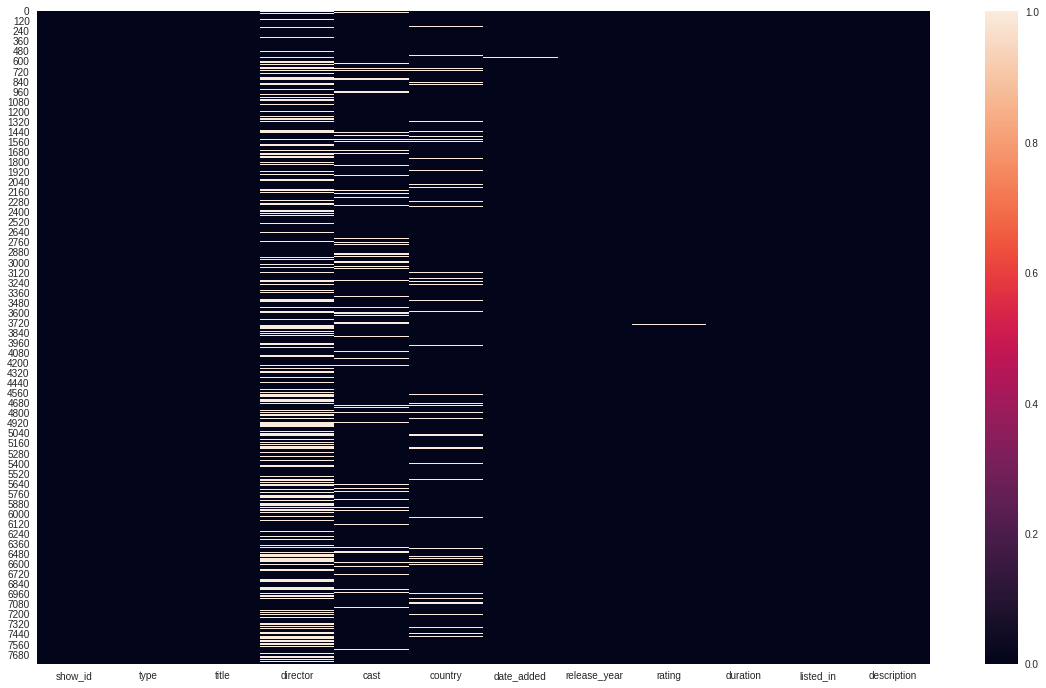

In [143]:
# Visualizing the missing values
plt.figure(figsize=(20,12))
sns.heatmap(nmc_df.isna())

### What did you know about your dataset?

This Dataset content only one numerical colums and content null values

## ***2. Understanding Your Variables***

In [144]:
# Dataset Columns
nmc_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [145]:
# Dataset Describe
nmc_df.describe(include ='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Check Unique Values for each variable.

In [146]:
# Check Unique Values for each variable.
nmc_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [147]:
# first check the show id column

nmc_df['show_id'].value_counts().sum()

7787

In [148]:
# checking type column

nmc_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [149]:
# checking title column

nmc_df['title'].nunique()

7787

In [150]:
# checking director column

nmc_df['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [151]:
# checking cast column

nmc_df['cast'].nunique()

6831

In [152]:
# checking country column

nmc_df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [153]:
# checking rating column

nmc_df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [154]:
# checking duration column

nmc_df['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [155]:
# overview of the null values of rating column

nmc_df[nmc_df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [156]:
# Replace the null values

nmc_df['rating'].replace(np.nan,'TV-MA',inplace=True)

In [157]:
# Check for confirmation

nmc_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [158]:
# Overview of the null values in date added column

nmc_df[nmc_df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [159]:
# Taking only not null values

nmc_df=nmc_df[nmc_df['date_added'].notna()]

In [160]:
# check for confirmation

nmc_df.isnull().sum()

show_id            0
type               0
title              0
director        2379
cast             718
country          506
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [161]:
# overview of the null values in country column

nmc_df[nmc_df['country'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,TV-MA,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NaN,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
...,...,...,...,...,...,...,...,...,...,...,...,...
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",NaN,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7746,s7747,TV Show,دفعة القاهرة,NaN,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",NaN,"April 25, 2020",2019,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [162]:
# Fill the country with unknown

nmc_df['country']=nmc_df['country'].fillna('unknown')

In [163]:
# check for confirmation

nmc_df.isnull().sum()

show_id            0
type               0
title              0
director        2379
cast             718
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [164]:
# overview of the null values in cast column

nmc_df[nmc_df['cast'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
25,s26,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,"June 30, 2016",2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...
26,s27,TV Show,(Un)Well,NaN,NaN,United States,"August 12, 2020",2020,TV-MA,1 Season,Reality TV,This docuseries takes a deep dive into the luc...
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
35,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,"December 1, 2016",2016,TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...
...,...,...,...,...,...,...,...,...,...,...,...,...
7679,s7680,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
7686,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",2016,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."
7766,s7767,TV Show,Zig & Sharko,NaN,NaN,France,"December 1, 2017",2016,TV-Y7,1 Season,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t..."
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [165]:
# replace nan values with not available

nmc_df['cast'].replace(np.nan, 'Not Avaible',inplace  = True)

In [166]:
# check for confirmation

nmc_df.isnull().sum()

show_id            0
type               0
title              0
director        2379
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [167]:
# drop the director column

nmc_df.drop(['director'],axis=1, inplace=True)

In [168]:
# check for confirmation

nmc_df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<AxesSubplot:>

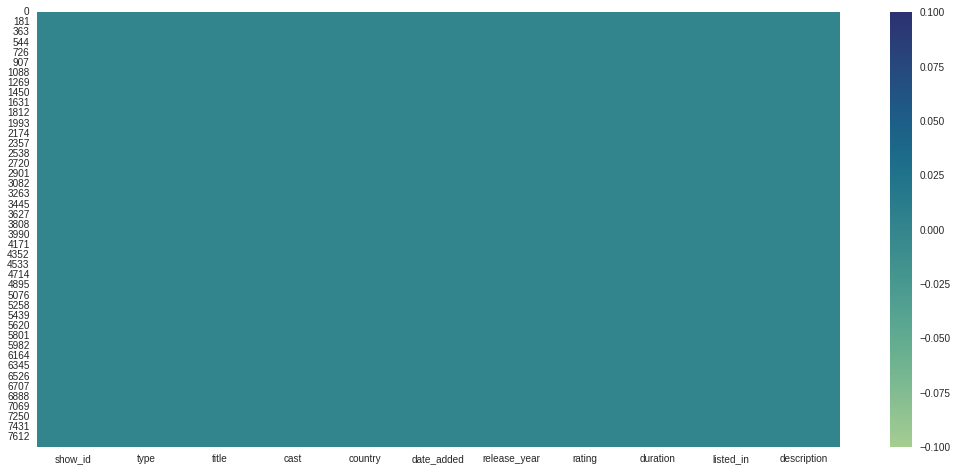

In [169]:
# plot a graph to show the null values 

plt.figure(figsize=(18,8))
sns.heatmap(nmc_df.isnull(),cmap='crest')

### What all manipulations have you done and insights you found?

In this manipulation we replace the null value with somevalue and drop the director coloumn because it content null vakues



## ***6. Feature Engineering***

In [170]:
# changing the data type of the date column from object to datetime

nmc_df['date_added']=pd.to_datetime(nmc_df['date_added'])

In [171]:
# confirmation that date added column datatype changed or not

nmc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   cast          7777 non-null   object        
 4   country       7777 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   object        
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 729.1+ KB


In [172]:
# Adding month column

nmc_df['month']=nmc_df['date_added'].dt.month

In [173]:
# add day column

nmc_df['day']=nmc_df['date_added'].dt.day

In [174]:
# add day name column

nmc_df['day_name']=nmc_df['date_added'].dt.day_name()

In [175]:
# add column to that the day is weekend or not

nmc_df['weekend']=nmc_df['day_name'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [176]:
# confirmation

nmc_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month,day,day_name,weekend
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,14,Friday,0
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,23,Friday,0
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,20,Thursday,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,16,Thursday,0
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,Wednesday,0


In [177]:
# drop the date added column

nmc_df.drop('date_added',axis=1,inplace=True)

In [178]:
# confirmation

nmc_df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,month,day,day_name,weekend
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,14,Friday,0
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,23,Friday,0
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,20,Thursday,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,16,Thursday,0
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,Wednesday,0


### Data Cleaning Column Wise

In [179]:
# Check the dataframe first before cleaning 

nmc_df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,month,day,day_name,weekend
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,14,Friday,0
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,23,Friday,0
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,20,Thursday,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,16,Thursday,0
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,Wednesday,0


In [180]:
# removing s alphabet from show id column

nmc_df['show_id']=nmc_df['show_id'].apply(lambda x :  x.split('s')[1])

In [181]:
# convert show id datatype into int16

nmc_df['show_id']=nmc_df['show_id'].astype('int16')

In [182]:
# confirmation

nmc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   int16 
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   cast          7777 non-null   object
 4   country       7777 non-null   object
 5   release_year  7777 non-null   int64 
 6   rating        7777 non-null   object
 7   duration      7777 non-null   object
 8   listed_in     7777 non-null   object
 9   description   7777 non-null   object
 10  month         7777 non-null   int64 
 11  day           7777 non-null   int64 
 12  day_name      7777 non-null   object
 13  weekend       7777 non-null   int64 
dtypes: int16(1), int64(4), object(9)
memory usage: 865.8+ KB


In [183]:
# check the unique options

nmc_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

### Remove these special character and stopwords

In [184]:
# install neat text to remove special characters and stopwords

!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [185]:
# import neattext function 

import neattext.functions as nfx

In [186]:
# removing special character using lambda function

nmc_df['title']=nmc_df['title'].str.lower().apply(lambda x :nfx.remove_special_characters(x))

In [187]:
# removing stopwords

nmc_df['title']=nmc_df['title'].str.lower().apply(lambda x :nfx.remove_stopwords(x))

In [188]:
# confirmation

nmc_df['title']

0                             3
1                           719
2                          2359
3                             9
4                            21
                 ...           
7782                       zozo
7783                     zubaan
7784             zulu man japan
7785            zumbos desserts
7786    zz little ol band texas
Name: title, Length: 7777, dtype: object

### Seprating cast members

In [189]:
# split the cast members 

nmc_df['cast'] = nmc_df['cast'].apply(lambda x :  x.split(','))

In [190]:
# add cast member column using length function

nmc_df['cast_member']=nmc_df['cast'].apply(lambda x : len(x))

In [191]:
# confirmation

nmc_df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,month,day,day_name,weekend,cast_member
0,1,TV Show,3,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,14,Friday,0,11
1,2,Movie,719,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,23,Friday,0,6
2,3,Movie,2359,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,20,Thursday,0,9
3,4,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,16,Thursday,0,9
4,5,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,Wednesday,0,12


In [192]:
# check unique values for country

nmc_df['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'unknown', 'Norway, Iceland, United States', 'United Kingdom',
       'Japan', 'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania',
       'Spain', 'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada

In [193]:
# add a column which contain primary country

nmc_df['primary_country'] = nmc_df['country'].apply(lambda x: x.split(',')[0])

In [194]:
# split the country

nmc_df['country'] = nmc_df['country'].apply(lambda x: x.split(','))

In [195]:
# confirmation

nmc_df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,month,day,day_name,weekend,cast_member,primary_country
0,1,TV Show,3,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,14,Friday,0,11,Brazil
1,2,Movie,719,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,23,Friday,0,6,Mexico
2,3,Movie,2359,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,20,Thursday,0,9,Singapore
3,4,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,16,Thursday,0,9,United States
4,5,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,Wednesday,0,12,United States


In [196]:
# create column of number of column
nmc_df['no_of_country']=nmc_df['country'].apply(lambda x: len(x))

In [197]:
# confirmation

nmc_df.tail()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,month,day,day_name,weekend,cast_member,primary_country,no_of_country
7782,7783,Movie,zozo,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...","[Sweden, Czech Republic, United Kingdom, De...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,10,19,Monday,0,7,Sweden,5
7783,7784,Movie,zubaan,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",[India],2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,2,Saturday,1,8,India,1
7784,7785,Movie,zulu man japan,[Nasty C],[unknown],2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",9,25,Friday,0,1,unknown,1
7785,7786,TV Show,zumbos desserts,"[Adriano Zumbo, Rachel Khoo]",[Australia],2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,31,Saturday,1,2,Australia,1
7786,7787,Movie,zz little ol band texas,[Not Avaible],"[United Kingdom, Canada, United States]",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,3,1,Sunday,1,1,United Kingdom,3


In [198]:
# checking unique years of release year

nmc_df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [199]:
# Check the unique rating values

nmc_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [200]:
# check unique values for listed_in column

nmc_df['listed_in'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [201]:
# add a column which contain primary genre

nmc_df['primary_genre'] = nmc_df['listed_in'].apply(lambda x: x.split(',')[0])

In [202]:
# split the genre

nmc_df['genre'] = nmc_df['listed_in'].apply(lambda x: x.split(','))

In [203]:
# now there is no need of listed_in column so drop them

nmc_df.drop('listed_in',axis=1,inplace=True)

In [204]:
# create a column to number of genre 

nmc_df['no_of_genre']=nmc_df['genre'].apply(lambda x: len(x))

In [205]:
# confirmation

nmc_df.head()

,show_id,type,title,cast,country,release_year,rating,duration,description,month,day,day_name,weekend,cast_member,primary_country,no_of_country,primary_genre,genre,no_of_genre
0,1,TV Show,3,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...,8,14,Friday,0,11,Brazil,1,International TV Shows,"[International TV Shows, TV Dramas, TV Sci-F...",3
1,2,Movie,719,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],2016,TV-MA,93 min,After a devastating earthquake hits Mexico Cit...,12,23,Friday,0,6,Mexico,1,Dramas,"[Dramas, International Movies]",2
2,3,Movie,2359,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],2011,R,78 min,"When an army recruit is found dead, his fellow...",12,20,Thursday,0,9,Singapore,1,Horror Movies,"[Horror Movies, International Movies]",2
3,4,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hi...",11,16,Thursday,0,9,United States,1,Action & Adventure,"[Action & Adventure, Independent Movies, Sci...",3
4,5,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],2008,PG-13,123 min,A brilliant group of students become card-coun...,1,1,Wednesday,0,12,United States,1,Dramas,[Dramas],1


### Create TV Shows Data Frame

In [206]:
# TV Show dataframe

tvshow_df=nmc_df[nmc_df['type']=='TV Show']
tvshow_df

,show_id,type,title,cast,country,release_year,rating,duration,description,month,day,day_name,weekend,cast_member,primary_country,no_of_country,primary_genre,genre,no_of_genre
0,1,TV Show,3,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...,8,14,Friday,0,11,Brazil,1,International TV Shows,"[International TV Shows, TV Dramas, TV Sci-F...",3
5,6,TV Show,46,"[Erdal Beşikçioğlu, Yasemin Allen, Melis Bir...",[Turkey],2016,TV-MA,1 Season,A genetics professor experiments with a treatm...,7,1,Saturday,1,10,Turkey,1,International TV Shows,"[International TV Shows, TV Dramas, TV Myste...",3
11,12,TV Show,1983,"[Robert Więckiewicz, Maciej Musiał, Michalin...","[Poland, United States]",2018,TV-MA,1 Season,"In this dark alt-history thriller, a naïve law...",11,30,Friday,0,12,Poland,2,Crime TV Shows,"[Crime TV Shows, International TV Shows, TV ...",3
12,13,TV Show,1994,[Not Avaible],[Mexico],2019,TV-MA,1 Season,Archival video and new interviews examine Mexi...,5,17,Friday,0,1,Mexico,1,Crime TV Shows,"[Crime TV Shows, Docuseries, International T...",3
16,17,TV Show,feb09,"[Shahd El Yaseen, Shaila Sabt, Hala, Hanadi...",[unknown],2018,TV-14,1 Season,"As a psychology professor faces Alzheimer's, h...",3,20,Wednesday,0,10,unknown,1,International TV Shows,"[International TV Shows, TV Dramas]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,7768,TV Show,zindagi gulzar hai,"[Sanam Saeed, Fawad Khan, Ayesha Omer, Mehr...",[Pakistan],2012,TV-PG,1 Season,"Strong-willed, middle-class Kashaf and carefre...",12,15,Thursday,0,9,Pakistan,1,International TV Shows,"[International TV Shows, Romantic TV Shows, ...",3
7775,7776,TV Show,zoids wild,"[Kensho Ono, Takahiro Sakurai, Mikako Komats...",[Japan],2018,TV-Y7,1 Season,A quest for freedom and legendary treasure beg...,8,14,Friday,0,13,Japan,1,Anime Series,"[Anime Series, Kids' TV]",2
7777,7778,TV Show,zombie dumb,[Not Avaible],[unknown],2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g...",7,1,Monday,0,1,unknown,1,Kids' TV,"[Kids' TV, Korean TV Shows, TV Comedies]",3
7779,7780,TV Show,zona rosa,"[Manu NNa, Ana Julia Yeyé, Ray Contreras, P...",[Mexico],2019,TV-MA,1 Season,An assortment of talent takes the stage for a ...,11,26,Tuesday,0,4,Mexico,1,International TV Shows,"[International TV Shows, Spanish-Language TV ...",3


In [207]:
# Remove the season word from the column

tvshow_df['duration']=tvshow_df['duration'].apply(lambda x : x.split()[0])

In [208]:
movies_df=nmc_df[nmc_df['type']=='Movie']
movies_df

,show_id,type,title,cast,country,release_year,rating,duration,description,month,day,day_name,weekend,cast_member,primary_country,no_of_country,primary_genre,genre,no_of_genre
1,2,Movie,719,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],2016,TV-MA,93 min,After a devastating earthquake hits Mexico Cit...,12,23,Friday,0,6,Mexico,1,Dramas,"[Dramas, International Movies]",2
2,3,Movie,2359,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],2011,R,78 min,"When an army recruit is found dead, his fellow...",12,20,Thursday,0,9,Singapore,1,Horror Movies,"[Horror Movies, International Movies]",2
3,4,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hi...",11,16,Thursday,0,9,United States,1,Action & Adventure,"[Action & Adventure, Independent Movies, Sci...",3
4,5,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],2008,PG-13,123 min,A brilliant group of students become card-coun...,1,1,Wednesday,0,12,United States,1,Dramas,[Dramas],1
6,7,Movie,122,"[Amina Khalil, Ahmed Dawood, Tarek Lotfy, A...",[Egypt],2019,TV-MA,95 min,"After an awful accident, a couple admitted to ...",6,1,Monday,0,8,Egypt,1,Horror Movies,"[Horror Movies, International Movies]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,7782,Movie,zoom,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",[United States],2006,PG,88 min,"Dragged from civilian life, a former superhero...",1,11,Saturday,1,9,United States,1,Children & Family Movies,"[Children & Family Movies, Comedies]",2
7782,7783,Movie,zozo,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...","[Sweden, Czech Republic, United Kingdom, De...",2005,TV-MA,99 min,When Lebanon's Civil War deprives Zozo of his ...,10,19,Monday,0,7,Sweden,5,Dramas,"[Dramas, International Movies]",2
7783,7784,Movie,zubaan,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",[India],2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,3,2,Saturday,1,8,India,1,Dramas,"[Dramas, International Movies, Music & Music...",3
7784,7785,Movie,zulu man japan,[Nasty C],[unknown],2019,TV-MA,44 min,"In this documentary, South African rapper Nast...",9,25,Friday,0,1,unknown,1,Documentaries,"[Documentaries, International Movies, Music ...",3


In [209]:
# Remove the min word from duration column

movies_df['duration']=movies_df['duration'].apply(lambda x:x.split()[0])
movies_df

,show_id,type,title,cast,country,release_year,rating,duration,description,month,day,day_name,weekend,cast_member,primary_country,no_of_country,primary_genre,genre,no_of_genre
1,2,Movie,719,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],2016,TV-MA,93,After a devastating earthquake hits Mexico Cit...,12,23,Friday,0,6,Mexico,1,Dramas,"[Dramas, International Movies]",2
2,3,Movie,2359,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],2011,R,78,"When an army recruit is found dead, his fellow...",12,20,Thursday,0,9,Singapore,1,Horror Movies,"[Horror Movies, International Movies]",2
3,4,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],2009,PG-13,80,"In a postapocalyptic world, rag-doll robots hi...",11,16,Thursday,0,9,United States,1,Action & Adventure,"[Action & Adventure, Independent Movies, Sci...",3
4,5,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],2008,PG-13,123,A brilliant group of students become card-coun...,1,1,Wednesday,0,12,United States,1,Dramas,[Dramas],1
6,7,Movie,122,"[Amina Khalil, Ahmed Dawood, Tarek Lotfy, A...",[Egypt],2019,TV-MA,95,"After an awful accident, a couple admitted to ...",6,1,Monday,0,8,Egypt,1,Horror Movies,"[Horror Movies, International Movies]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,7782,Movie,zoom,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",[United States],2006,PG,88,"Dragged from civilian life, a former superhero...",1,11,Saturday,1,9,United States,1,Children & Family Movies,"[Children & Family Movies, Comedies]",2
7782,7783,Movie,zozo,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...","[Sweden, Czech Republic, United Kingdom, De...",2005,TV-MA,99,When Lebanon's Civil War deprives Zozo of his ...,10,19,Monday,0,7,Sweden,5,Dramas,"[Dramas, International Movies]",2
7783,7784,Movie,zubaan,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",[India],2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,3,2,Saturday,1,8,India,1,Dramas,"[Dramas, International Movies, Music & Music...",3
7784,7785,Movie,zulu man japan,[Nasty C],[unknown],2019,TV-MA,44,"In this documentary, South African rapper Nast...",9,25,Friday,0,1,unknown,1,Documentaries,"[Documentaries, International Movies, Music ...",3


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis

#### Chart - 1 Show id column

<AxesSubplot:xlabel='show_id', ylabel='Density'>

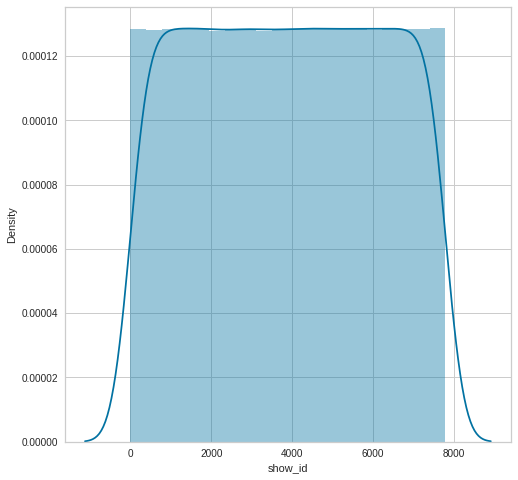

In [210]:
plt.figure(figsize=(8,8))
sns.distplot(nmc_df['show_id'])

### What is/are the insight(s) found from the chart?

* show id column distribution is almost normal
* there are some values are missing which are droped by us during missing values treatment

#### Chart - 2 Type column

<AxesSubplot:ylabel='type'>

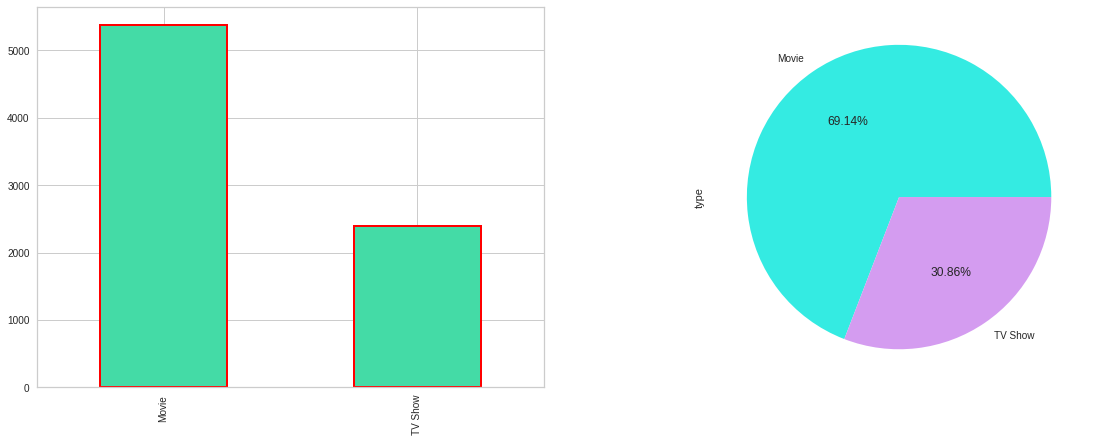

In [211]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
nmc_df['type'].value_counts().plot(kind='bar',color='#44dba6',edgecolor='red',linewidth=2)
plt.subplot(1,2,2)
nmc_df['type'].value_counts().plot(kind='pie',colors=['#34ebe2','#d49cf0'],autopct='%.2f%%')

### What is/are the insight(s) found from the chart?

Netflix contain almost 2/3 Movies and 1/3 TV Shows

#### Chart - 3 Cast Member Column

<AxesSubplot:xlabel='cast_member', ylabel='Density'>

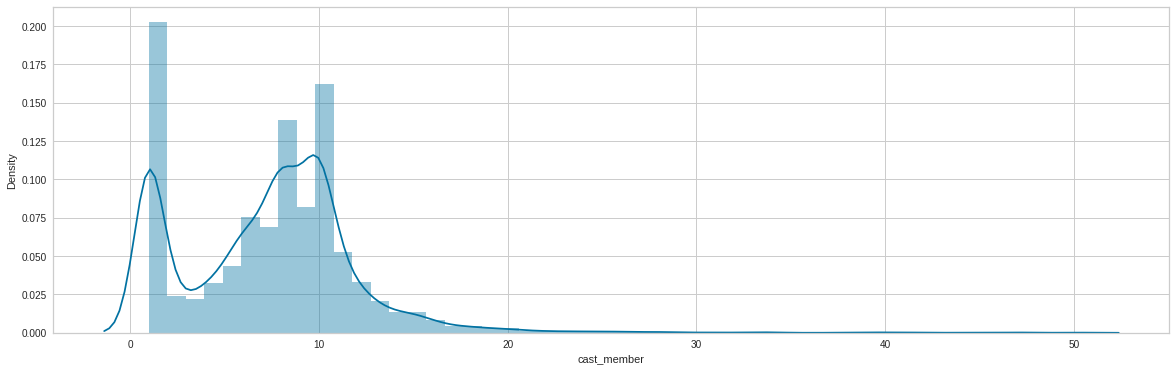

In [212]:
plt.figure(figsize=(20,6))
sns.distplot(nmc_df['cast_member'])

### What is/are the insight(s) found from the chart?

Mostly members are one and along side there are average of 10 member's cast

#### Chart - 4 Country Column

<AxesSubplot:xlabel='no_of_country', ylabel='Density'>

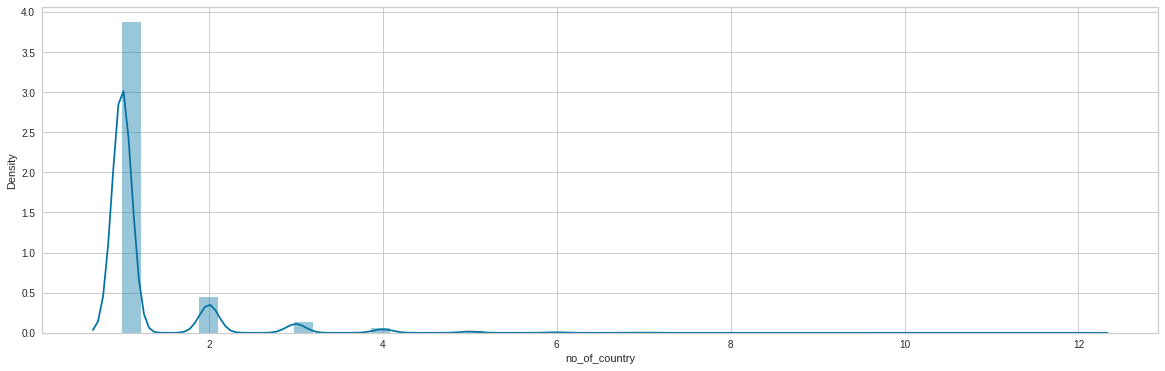

In [213]:
plt.figure(figsize=(20,6))
sns.distplot(nmc_df['no_of_country'])

### What is/are the insight(s) found from the chart?

Mostly movies/tv show are released in one country but according to above graph some movies/tv show released in many countries

#### Chart - 5 Released year column

<AxesSubplot:xlabel='release_year', ylabel='Density'>

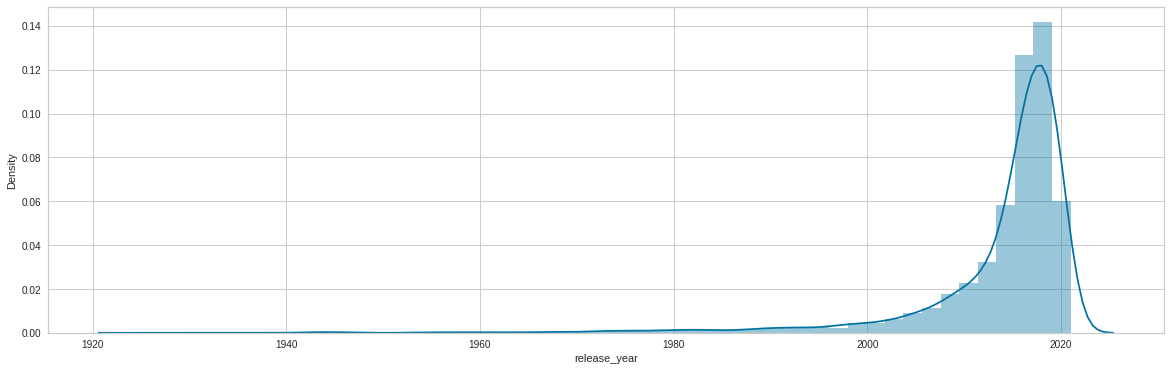

In [214]:
plt.figure(figsize=(20,6))
sns.distplot(nmc_df['release_year'])

### What is/are the insight(s) found from the chart?

Mostly content coome in last 5 year according to graph

#### Chart - 6 Rating Column

<AxesSubplot:ylabel='rating'>

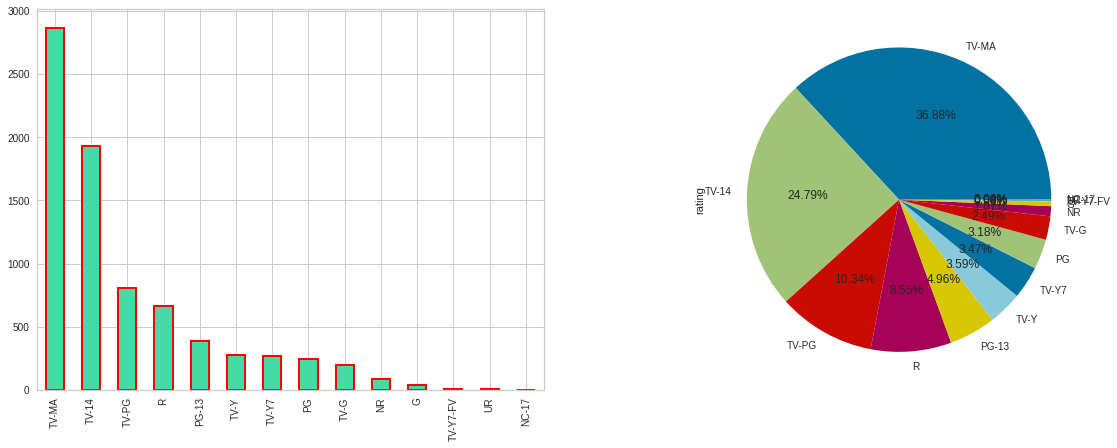

In [215]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
nmc_df['rating'].value_counts().plot(kind='bar',color='#44dba6',edgecolor='red',linewidth=2)
plt.subplot(1,2,2)
nmc_df['rating'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [216]:
# make a dictionary to replace rating values

rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

# replace the values

nmc_df['rating'].replace(rating_map, inplace = True)

<AxesSubplot:ylabel='rating'>

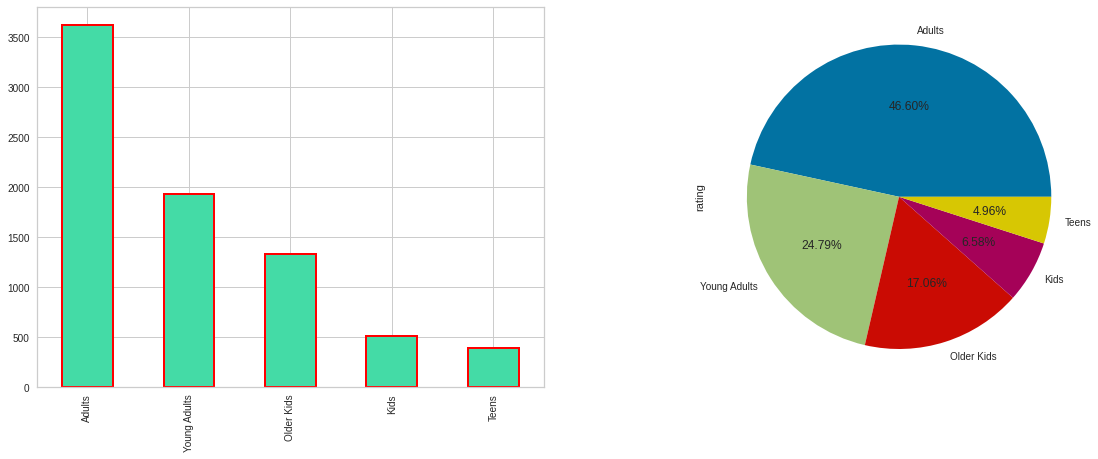

In [217]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
nmc_df['rating'].value_counts().plot(kind='bar',color='#44dba6',edgecolor='red',linewidth=2)
plt.subplot(1,2,2)
nmc_df['rating'].value_counts().plot(kind='pie',autopct='%.2f%%')

#### Chart - 7 Duration Column

<AxesSubplot:xlabel='duration', ylabel='Density'>

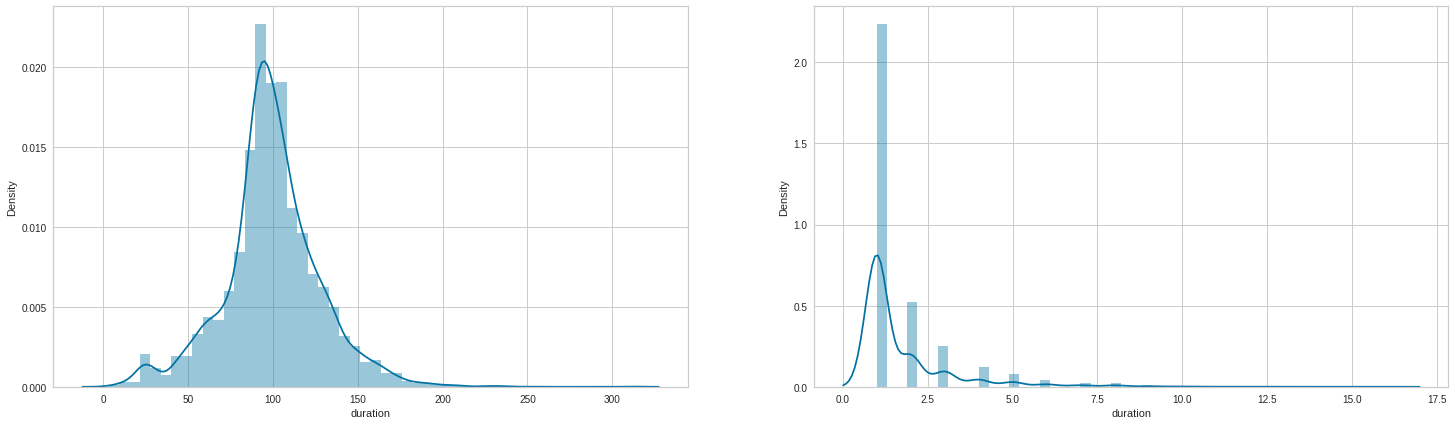

In [218]:
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.distplot(movies_df['duration'])
plt.subplot(1,2,2)
sns.distplot(tvshow_df['duration'])

### What is/are the insight(s) found from the chart?

First distribution is for Movies minutes duration
second distribution is for tv shows seasons

#### Chart - 8 Month Column

<AxesSubplot:ylabel='month'>

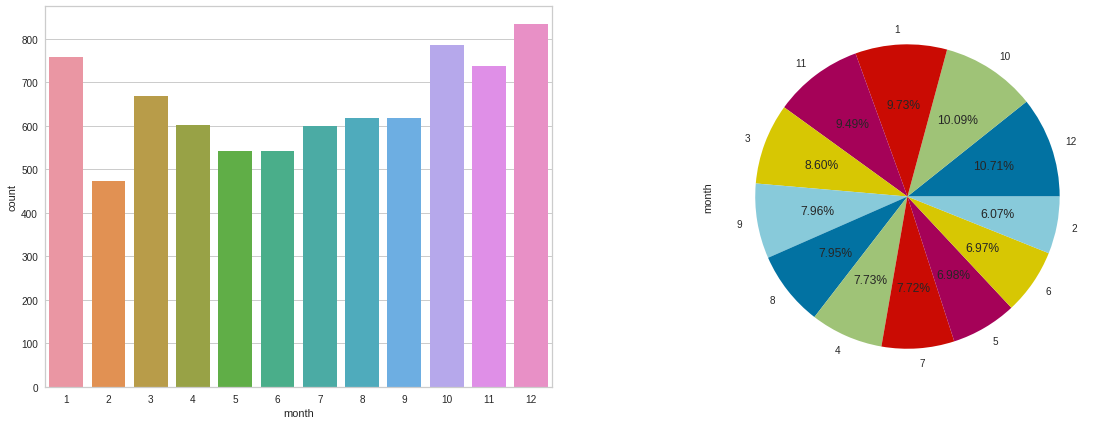

In [219]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(nmc_df['month'])
plt.subplot(1,2,2)
nmc_df['month'].value_counts().plot(kind='pie',autopct='%.2f%%')

#### Chart - 9 Day column

<AxesSubplot:xlabel='day', ylabel='count'>

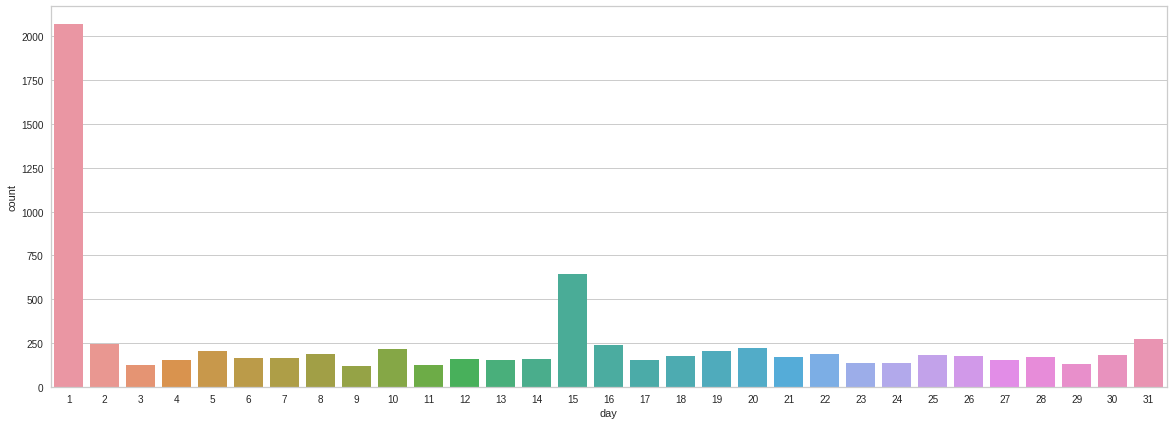

In [220]:
plt.figure(figsize=(20,7))
#plt.subplot(1,2,1)
sns.countplot(nmc_df['day'])

#### Chart - 10 Day Name Column

<AxesSubplot:ylabel='day_name'>

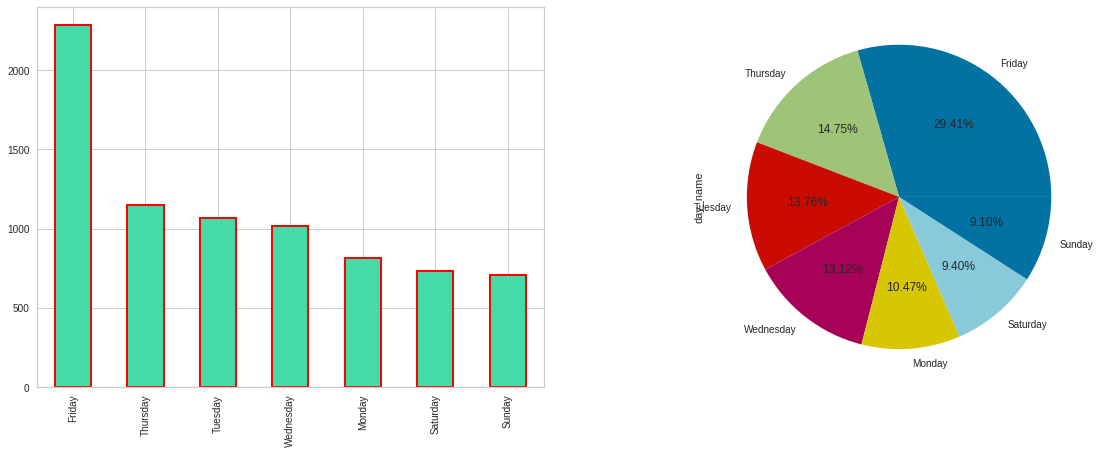

In [221]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
nmc_df['day_name'].value_counts().plot(kind='bar',color='#44dba6',edgecolor='red',linewidth=2)
plt.subplot(1,2,2)
nmc_df['day_name'].value_counts().plot(kind='pie',autopct='%.2f%%')

#### Chart - 11 Weekend Column

<AxesSubplot:ylabel='weekend'>

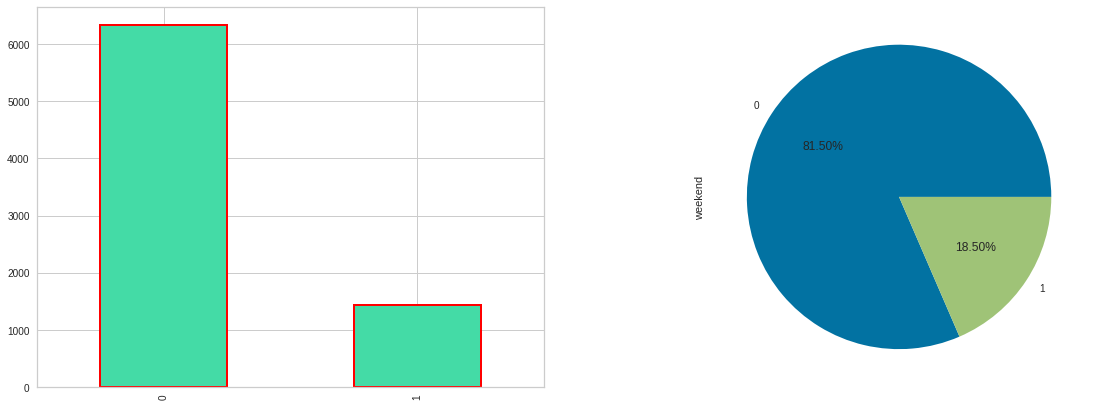

In [222]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
nmc_df['weekend'].value_counts().plot(kind='bar',color='#44dba6',edgecolor='red',linewidth=2)
plt.subplot(1,2,2)
nmc_df['weekend'].value_counts().plot(kind='pie',autopct='%.2f%%')

#### Chart - 12 Origin Country Column

<AxesSubplot:>

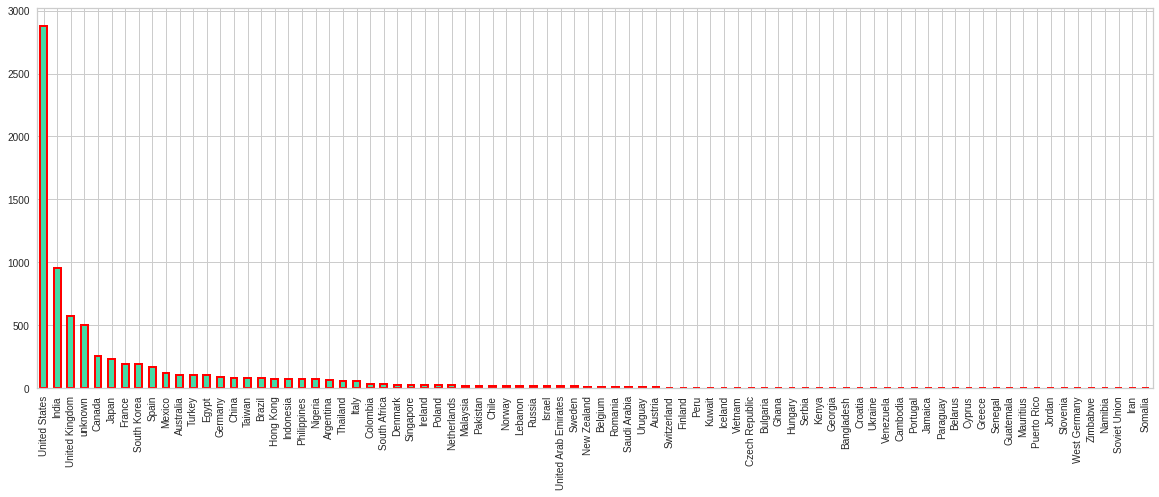

In [223]:
plt.figure(figsize=(20,7))
#plt.subplot(1,2,1)
nmc_df['primary_country'].value_counts().plot(kind='bar',color='#44dba6',edgecolor='red',linewidth=2)
#plt.subplot(1,2,2)
#df['month'].value_counts().plot(kind='pie',autopct='%.2f%%')

#### Chart - 13 Genre Column

<AxesSubplot:>

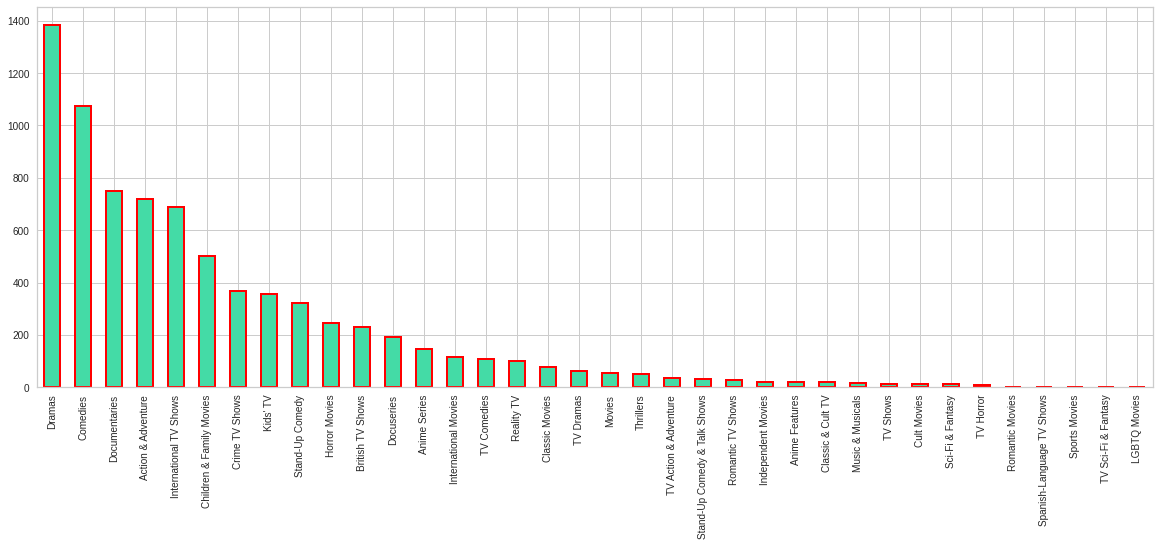

In [224]:
plt.figure(figsize=(20,7))
#plt.subplot(1,2,1)
nmc_df['primary_genre'].value_counts().plot(kind='bar',color='#44dba6',edgecolor='red',linewidth=2)
#plt.subplot(1,2,2)
#df['month'].value_counts().plot(kind='pie',autopct='%.2f%%')

#### Chart - 14 Number of genre Column

<AxesSubplot:ylabel='no_of_genre'>

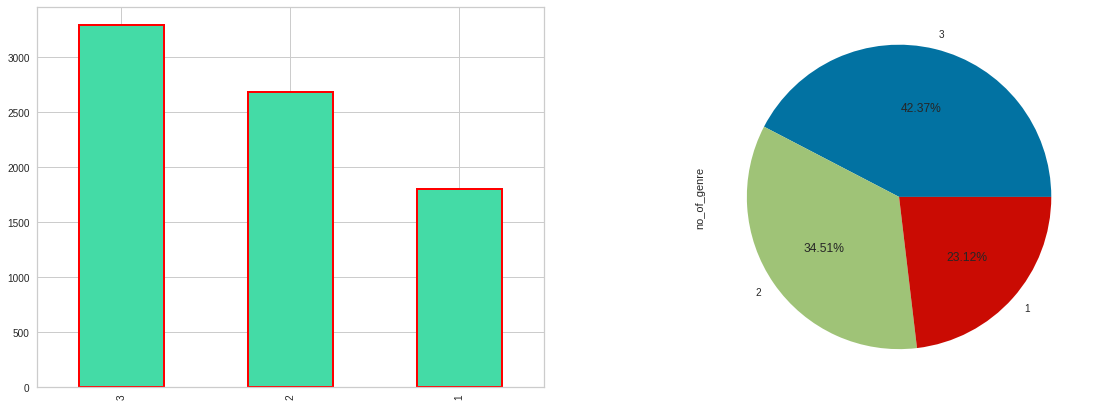

In [225]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
nmc_df['no_of_genre'].value_counts().plot(kind='bar',color='#44dba6',edgecolor='red',linewidth=2)
plt.subplot(1,2,2)
nmc_df['no_of_genre'].value_counts().plot(kind='pie',autopct='%.2f%%')

### Bivariate Analysis

<AxesSubplot:xlabel='release_year', ylabel='count'>

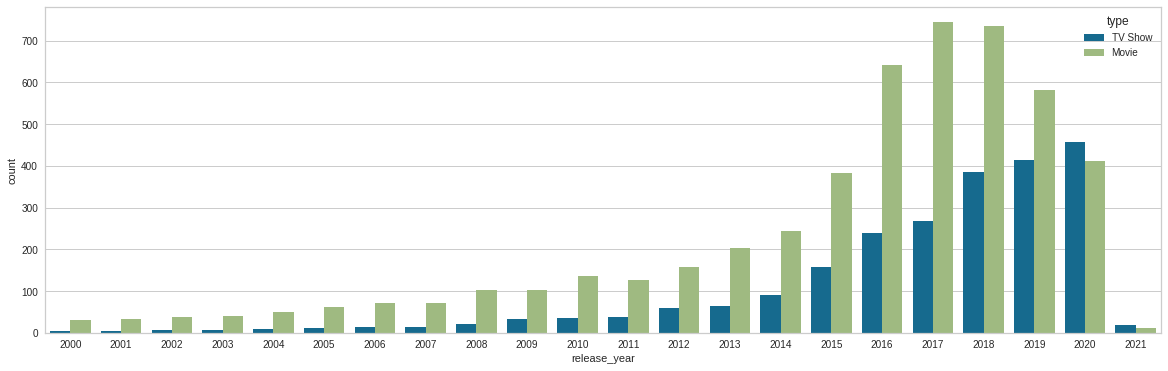

In [226]:
#year based analysis of movies and tv shows
plt.figure(figsize=(20,6))
sns.countplot(x='release_year',data=nmc_df, hue='type',order = range(2000,2022))

<AxesSubplot:xlabel='month', ylabel='count'>

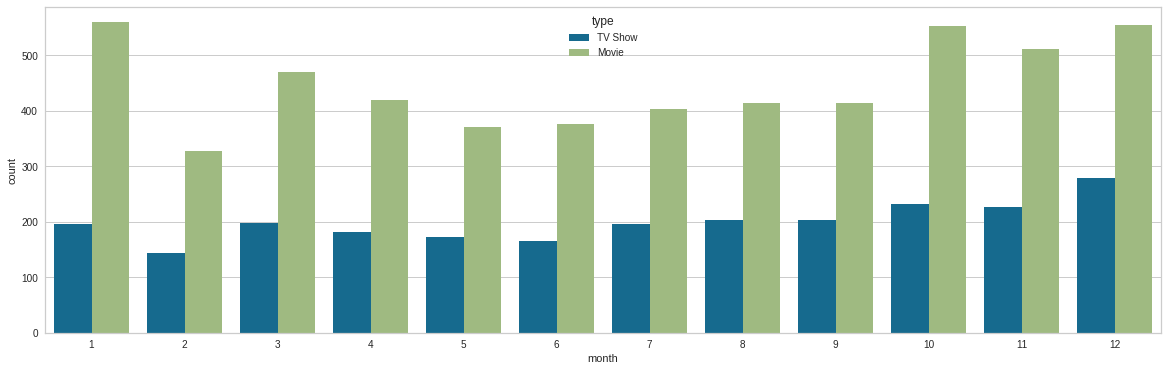

In [227]:
#month based analysis of movies and tv shows

plt.figure(figsize=(20,6))
sns.countplot(data=nmc_df,x='month',hue='type')

<AxesSubplot:xlabel='day', ylabel='count'>

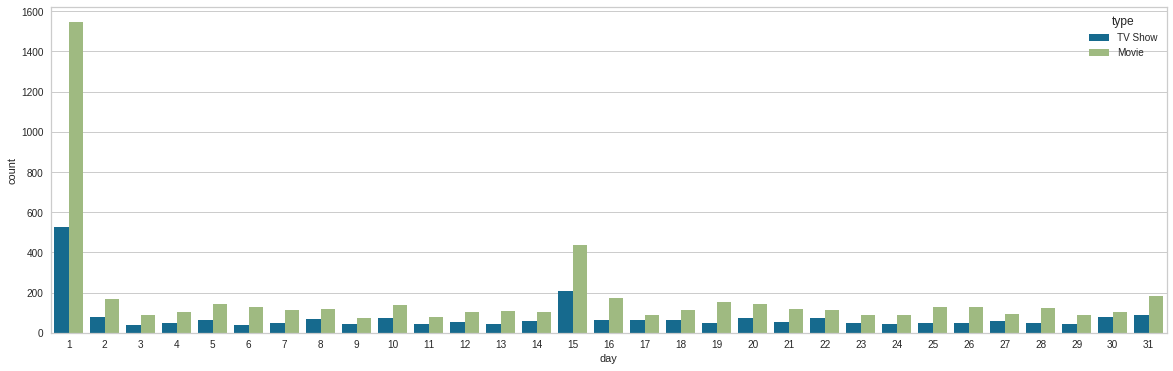

In [228]:
#Day based analysis of movies and tv shows
plt.figure(figsize=(20,6))
sns.countplot(data=nmc_df,x='day',hue='type')

<AxesSubplot:xlabel='day_name', ylabel='count'>

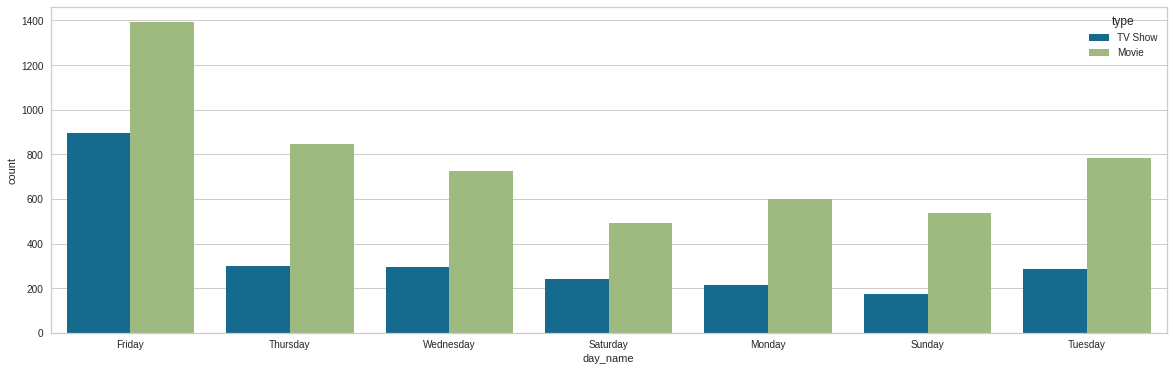

In [229]:
#Weekday based analysis of movies and tv shows

plt.figure(figsize=(20,6))
sns.countplot(data=nmc_df,x='day_name',hue='type')

<AxesSubplot:xlabel='rating', ylabel='count'>

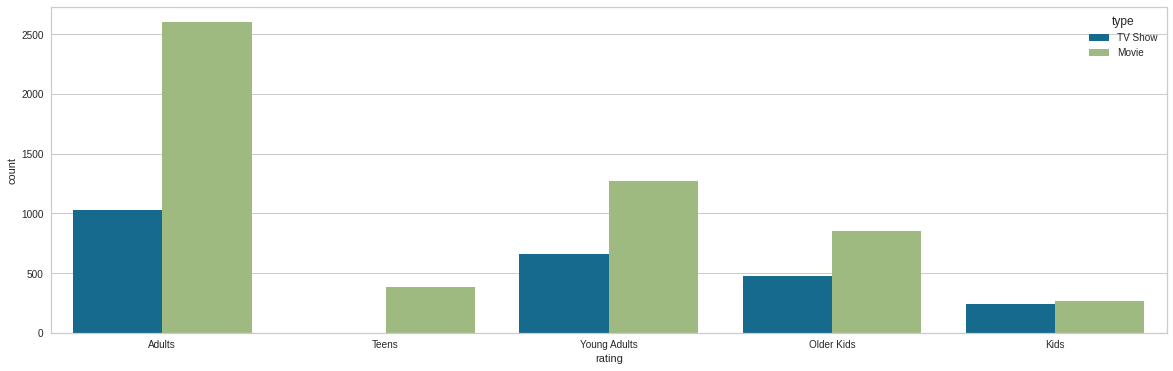

In [230]:
#Rating based analysis of movies and tv shows

plt.figure(figsize=(20,6))
sns.countplot(data=nmc_df,x='rating',hue='type')

## ***5. Data Pre-processing***

### Removing punctuation & Stopwords

In [231]:
# creating a function called remove_punctuation and using this function to appy on the description data in the dataset

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string

    # replacing the punctuations with no space, which in effect deletes the punctuation marks 

    translator = str.maketrans('', '', string.punctuation)

    # return the text stripped of punctuation marks
    
    return text.translate(translator)

In [232]:
# just check the description column to confirmation

nmc_df['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [233]:
# applying above created function on the description data to remove punctuations

nmc_df['description'] = nmc_df['description'].apply(remove_punctuation)

In [234]:
# confirmation

nmc_df['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

we already remove special character of title column with the help of neat text so no need to remove punctuation of title column

In [235]:
# Seeing the stop words 

import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array({'after', 'any', 'has', 'y', 'who', 'same', 'at', 'from', 'wouldn', 'them', "wasn't", 'a', 't', 'aren', 'into', "doesn't", 'this', 'am', 'then', 'can', 'below', 'weren', 'such', 'doesn', 'what', 'an', 'more', 'm', 'about', 'mightn', "she's", 'these', 'were', 'will', 'off', 'here', 'its', 'she', 'up', "didn't", "wouldn't", "you're", 'shouldn', 'that', 'isn', 'himself', "you've", 'they', 'themselves', "mustn't", 'before', 'do', 'or', 'and', 'where', 'haven', 'each', 'other', 'against', 'out', 'through', 's', "shan't", 'once', 'you', 'he', 'hasn', 'than', 'me', 'their', 'as', 'i', 'of', 'be', 'ma', 'needn', 'hadn', "hasn't", 'but', 'ours', 'does', 'if', 'have', 'until', 'to', 'under', 'should', "couldn't", 'which', 've', 'over', "won't", 'some', 'for', "mightn't", 'itself', 'few', 'whom', "shouldn't", 'now', 'was', 'there', 'further', 'is', "weren't", 'how', 'didn', 'yours', 'ain', 'our', "you'll", 'won', 'your', 'hers', 'doing', 'most', 'very', "isn't", 'shan', 'those', 'had', 'whi

In [236]:
# creatinf a function for removing the stop words in DESCRIPTION attribute

def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]

    # joining the list of words with space separator
    
    return " ".join(text)

In [237]:
# just check the description column for confirmation

nmc_df['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

In [238]:
# applying above function on the DESCRIPTION attribute

nmc_df['description']=nmc_df['description'].apply(stopwords)

In [239]:
# confirmation

nmc_df['description'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

### Stemming Description

In [240]:
# creating a function of stemming function using SnowballStemmer module

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [241]:
# just check the description column for confirmation

nmc_df['description'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [242]:
# applying above created STEMMING function to the DESCRIPTION attribute.

nmc_df['description'] = nmc_df['description'].apply(stemming)

In [243]:
# confirmation

nmc_df['description'][0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [244]:
# add description length column 

nmc_df['description_length']=nmc_df['description'].apply(lambda x : len(x))

In [245]:
# create function to convert list into string

def listToString(s):
    str1 = ""
    for ele in s:
        str1 += ele
    return str1

In [246]:
# convert list to string

nmc_df['genre']=nmc_df['genre'].apply(listToString)

In [247]:
# create a column for length of genre

nmc_df['genre_length']=nmc_df['genre'].apply(lambda x : len(x))

In [248]:
# confermation

nmc_df.head()

,show_id,type,title,cast,country,release_year,rating,duration,description,month,...,day_name,weekend,cast_member,primary_country,no_of_country,primary_genre,genre,no_of_genre,description_length,genre_length
0,1,TV Show,3,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],2020,Adults,4 Seasons,futur elit inhabit island paradis far crowd sl...,8,...,Friday,0,11,Brazil,1,International TV Shows,International TV Shows TV Dramas TV Sci-Fi & F...,3,82,52
1,2,Movie,719,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],2016,Adults,93 min,devast earthquak hit mexico citi trap survivor...,12,...,Friday,0,6,Mexico,1,Dramas,Dramas International Movies,2,88,27
2,3,Movie,2359,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],2011,Adults,78 min,armi recruit found dead fellow soldier forc co...,12,...,Thursday,0,9,Singapore,1,Horror Movies,Horror Movies International Movies,2,102,34
3,4,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],2009,Teens,80 min,postapocalypt world ragdol robot hide fear dan...,11,...,Thursday,0,9,United States,1,Action & Adventure,Action & Adventure Independent Movies Sci-Fi &...,3,89,54
4,5,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],2008,Teens,123 min,brilliant group student becom cardcount expert...,1,...,Wednesday,0,12,United States,1,Dramas,Dramas,1,99,6


## ***7. ML Model Implementation***

### ML Model - 1 K-Means Clustring(Elbow method)

In [249]:
# importing required modules from sklearn library

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [250]:
# standerd scale our data set train the dataset

X_features_rec_mon=nmc_df[['description_length','genre_length']]
scaler_rec_mon=StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

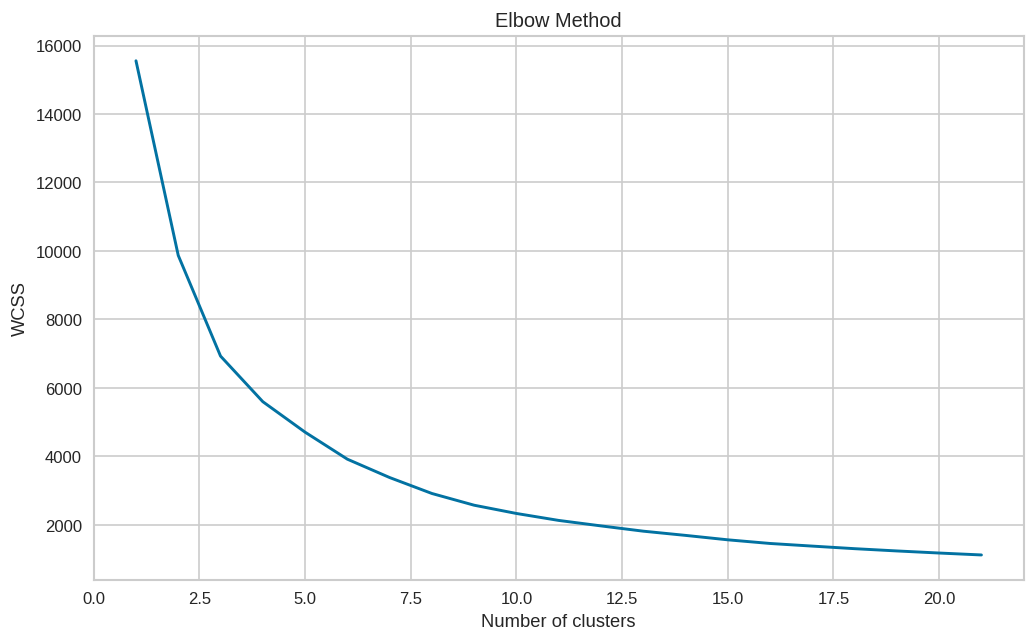

In [251]:
# Interpretation of a line plot with an elbow shape

plt.figure(figsize=(10,6), dpi=120)

# within clusters sum of squares
wcss=[]
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [252]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

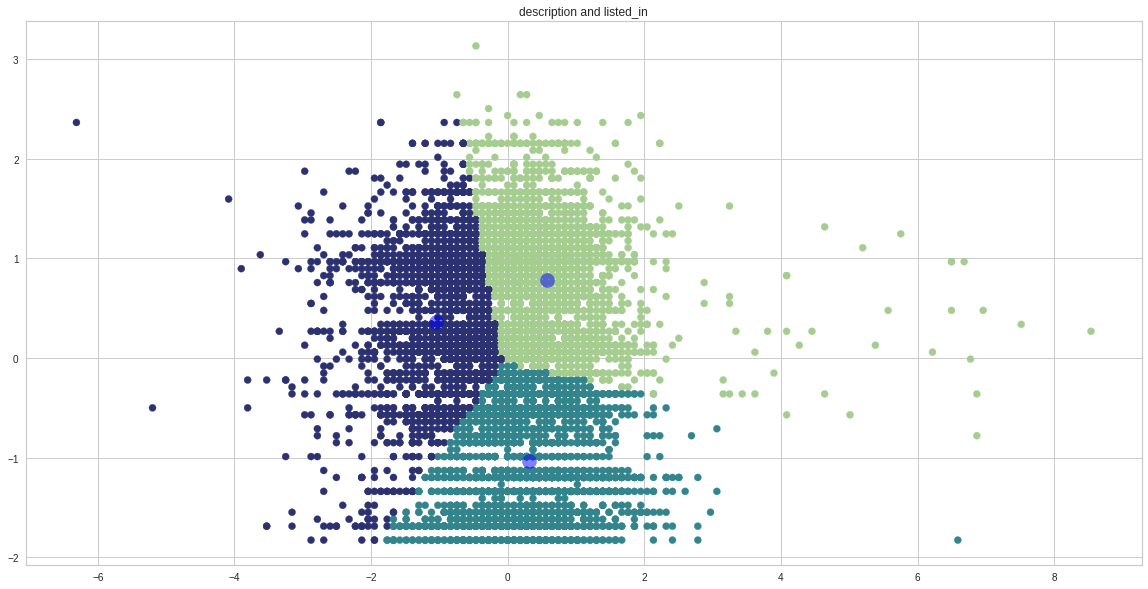

In [253]:
# plotting a scatterplot

plt.figure(figsize=(20,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap= 'crest')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

### ML Model - 2 Heirarchical Clustering(Dendogram)

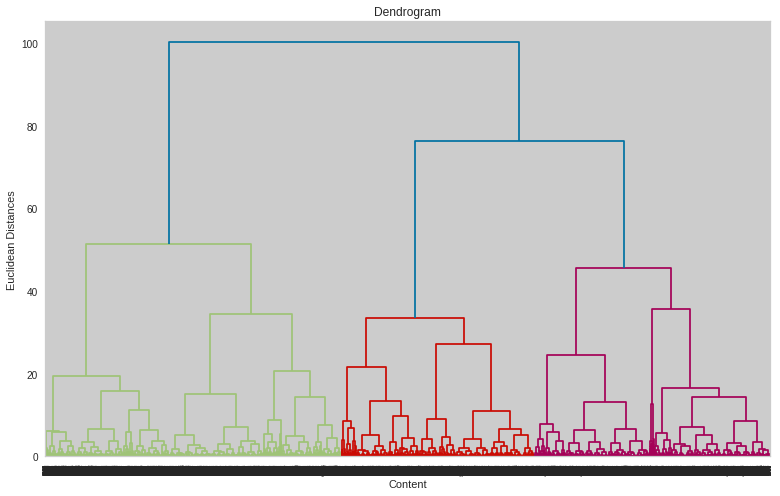

In [254]:
# creating dendogram

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() 

### Agglomerative hierarchical Clustering

In [255]:
# applying agglomerative clustring

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

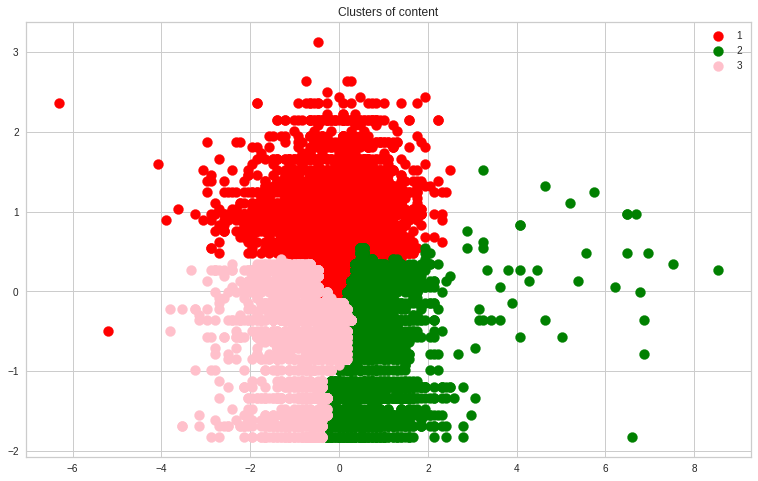

In [256]:
# graphical representaion

plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'pink', label = '3')
plt.title('Clusters of content')

plt.legend()
plt.show()

### ML Model - 3 Silhouette Score

In [257]:
# predict and check the silhouette score

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.35372581711111595
For n_clusters = 3, silhouette score is 0.3564566511007527
For n_clusters = 4, silhouette score is 0.328613710128642
For n_clusters = 5, silhouette score is 0.33661917004059755
For n_clusters = 6, silhouette score is 0.35343207770193086
For n_clusters = 7, silhouette score is 0.3551587854415987
For n_clusters = 8, silhouette score is 0.35048724809744847
For n_clusters = 9, silhouette score is 0.3502681611993904
For n_clusters = 10, silhouette score is 0.34495501318804883
For n_clusters = 11, silhouette score is 0.3402957161892702
For n_clusters = 12, silhouette score is 0.3408673817568811
For n_clusters = 13, silhouette score is 0.3397886803952157
For n_clusters = 14, silhouette score is 0.3505206032891038
For n_clusters = 15, silhouette score is 0.35198002618594193
For n_clusters = 16, silhouette score is 0.3604667144263376
For n_clusters = 17, silhouette score is 0.35534321299297833
For n_clusters = 18, silhouette score is 0

In [258]:
from yellowbrick.cluster import SilhouetteVisualizer

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      kmean_clusters = KMeans (n_clusters=n_clusters, random_state=5)
      predictions = kmean_clusters.fit_predict(X)
      centers = kmean_clusters.cluster_centers_

      score = silhouette_score(X, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(kmean_clusters)

      visualizer.fit(X) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.36155319154968923


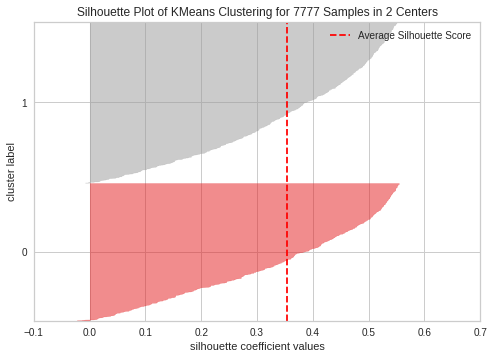

For n_clusters = 3, silhouette score is 0.36155319154968923


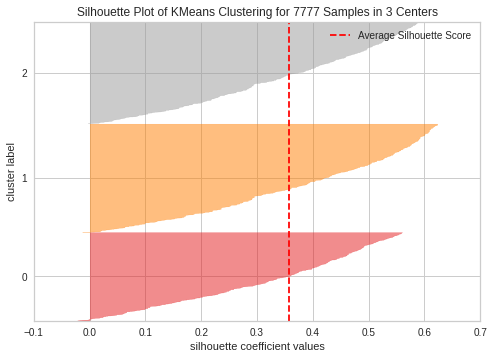

For n_clusters = 4, silhouette score is 0.36155319154968923


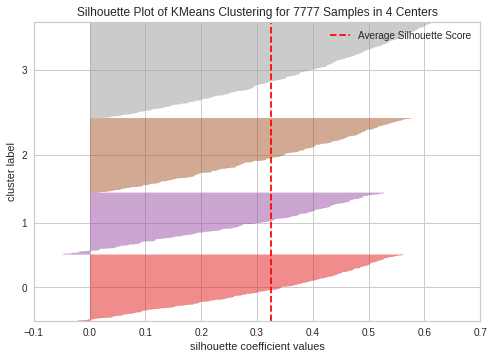

For n_clusters = 5, silhouette score is 0.36155319154968923


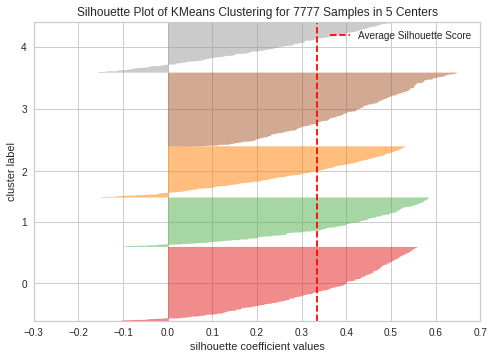

For n_clusters = 6, silhouette score is 0.36155319154968923


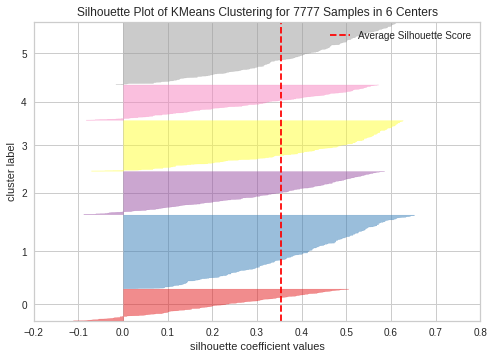

For n_clusters = 7, silhouette score is 0.36155319154968923


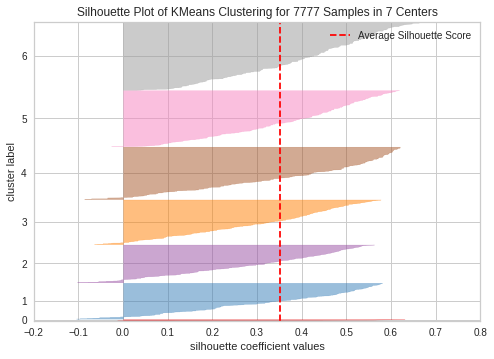

For n_clusters = 8, silhouette score is 0.36155319154968923


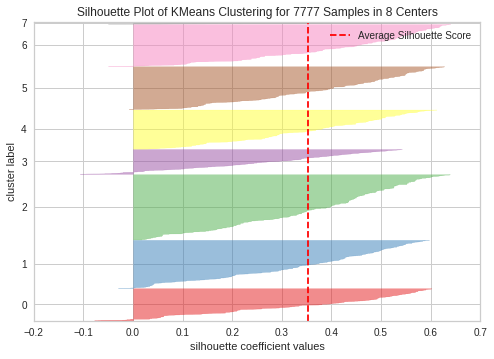

For n_clusters = 9, silhouette score is 0.36155319154968923


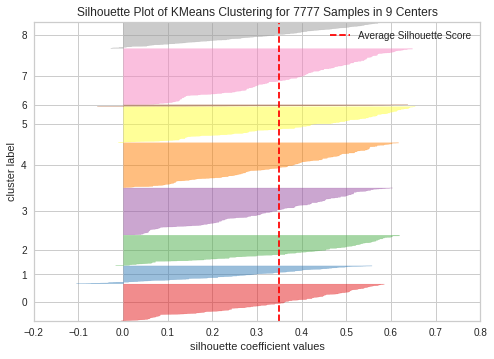

For n_clusters = 10, silhouette score is 0.36155319154968923


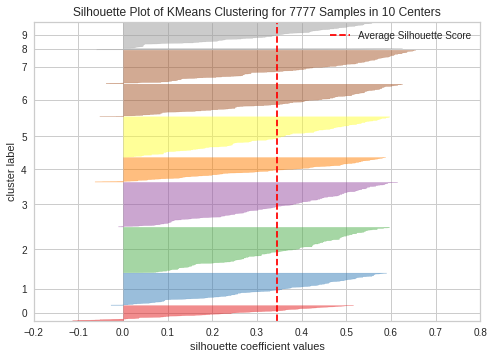

For n_clusters = 11, silhouette score is 0.36155319154968923


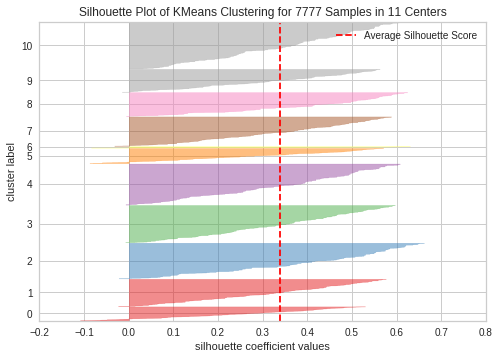

For n_clusters = 12, silhouette score is 0.36155319154968923


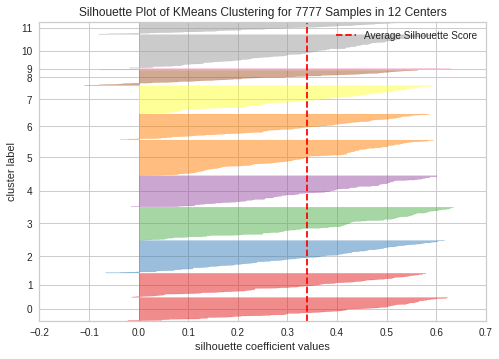

For n_clusters = 13, silhouette score is 0.36155319154968923


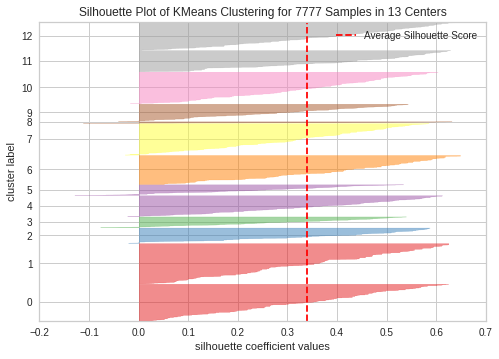

For n_clusters = 14, silhouette score is 0.36155319154968923


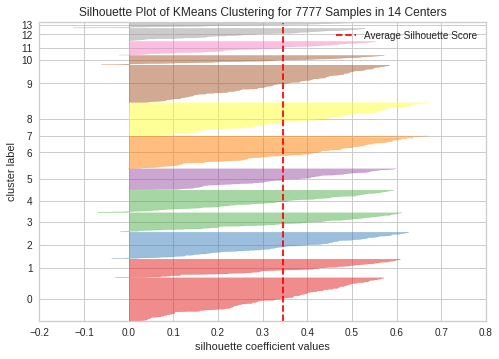

For n_clusters = 15, silhouette score is 0.36155319154968923


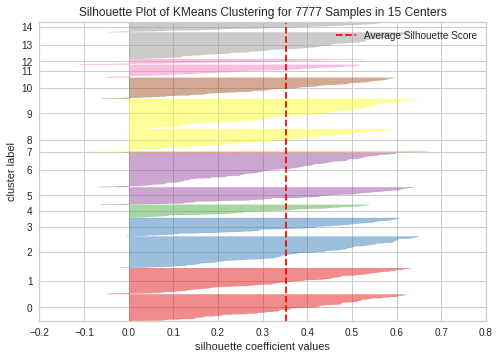

For n_clusters = 16, silhouette score is 0.36155319154968923


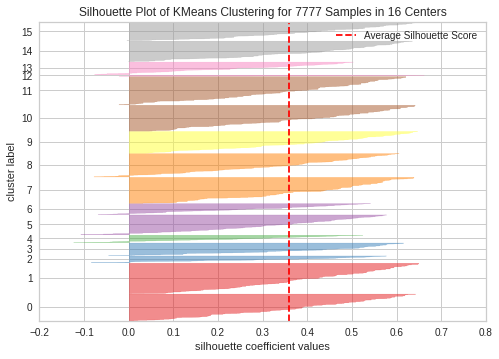

For n_clusters = 17, silhouette score is 0.36155319154968923


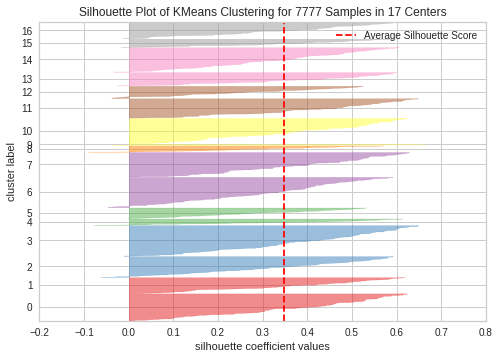

For n_clusters = 18, silhouette score is 0.36155319154968923


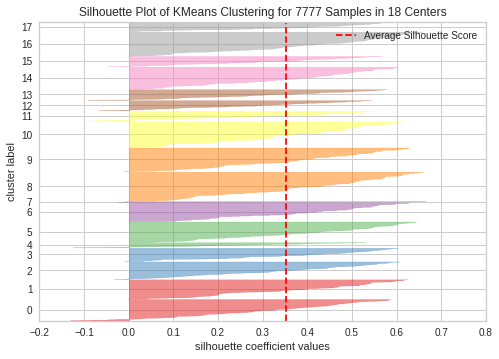

For n_clusters = 19, silhouette score is 0.36155319154968923


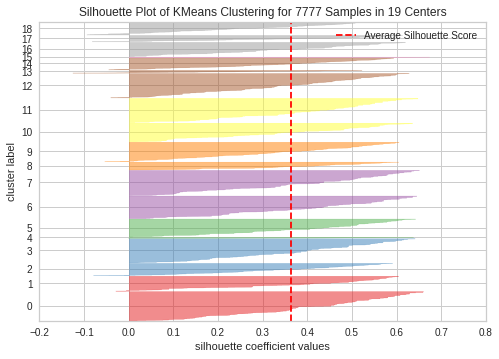

For n_clusters = 20, silhouette score is 0.36155319154968923


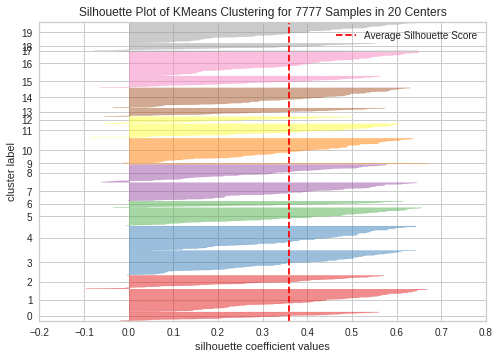

In [259]:
silhouette_score_analysis(21)

### Recommendation System

In [260]:
# converting datatype to string 

nmc_df['cast']=nmc_df['cast'].apply(listToString)
nmc_df['country']=nmc_df['country'].apply(listToString)

In [261]:
# create a single column for recommendation

clustering_df = nmc_df[['title']]
clustering_df['cluster_data'] = (nmc_df['description'] + ' ' + nmc_df['genre'] + ' ' + nmc_df['cast'] + ' ' + nmc_df['country'] + ' ' + nmc_df['rating']).astype(str)
clustering_df.set_index('title', inplace = True)
clustering_df.tail()

,cluster_data
title,
zozo,lebanon civil war depriv zozo famili hes left ...
zubaan,scrappi poor boy worm way tycoon dysfunct fami...
zulu man japan,documentari south african rapper nasti c hit s...
zumbos desserts,dessert wizard adriano zumbo look next “willi ...
zz little ol band texas,documentari delv mystiqu behind bluesrock trio...


In [262]:
bagging_of_words = clustering_df.cluster_data
bagging_of_words

title
3                          futur elit inhabit island paradis far crowd sl...
719                        devast earthquak hit mexico citi trap survivor...
2359                       armi recruit found dead fellow soldier forc co...
9                          postapocalypt world ragdol robot hide fear dan...
21                         brilliant group student becom cardcount expert...
                                                 ...                        
zozo                       lebanon civil war depriv zozo famili hes left ...
zubaan                     scrappi poor boy worm way tycoon dysfunct fami...
zulu man japan             documentari south african rapper nasti c hit s...
zumbos desserts            dessert wizard adriano zumbo look next “willi ...
zz little ol band texas    documentari delv mystiqu behind bluesrock trio...
Name: cluster_data, Length: 7777, dtype: object

In [263]:
# Converting a collection of texts to a matrix of token counts using CountVectorizer module

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bagging_of_words)
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.03269883, 0.02161593, ..., 0.0040259 , 0.02215877,
        0.00150292],
       [0.03269883, 1.        , 0.00746566, ..., 0.06073199, 0.00224573,
        0.00189826],
       [0.02161593, 0.00746566, 1.        , ..., 0.0105581 , 0.00216274,
        0.00182811],
       ...,
       [0.0040259 , 0.06073199, 0.0105581 , ..., 1.        , 0.00317596,
        0.16483431],
       [0.02215877, 0.00224573, 0.00216274, ..., 0.00317596, 1.        ,
        0.02589073],
       [0.00150292, 0.00189826, 0.00182811, ..., 0.16483431, 0.02589073,
        1.        ]])

In [264]:
indices = pd.Series(clustering_df.index)
indices[:5]

0       3
1     719
2    2359
3       9
4      21
Name: title, dtype: object

In [265]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(clustering_df.index)[i])
        
    return recommended_movies

In [266]:
movie_recommendations = pd.DataFrame(recommendations('second'), columns=['Recommendations'])
movie_recommendations.head(11)

,Recommendations
0,lo behold reveries connected world
1,inferno
2,catsthemewvie
3,bleeding edge
4,porn ends 3
5,feminists thinking
6,confession killer
7,oklahoma city
8,joe cocker mad dog soul
9,born gaza


# **Conclusion**

This Netflix Dataset is a Unsupervised machine leaning dataset

Data set contains 7787 rows and 12 columns

Director features contains large number of missing values (more then 30%) so we decided to drop this director attribute.

We have two types of content TV shows and Movies (30.86% contains TV shows and 69.14% contains Movies

The growth rate of the contanton netflix is exponential

Mostly movies are for adults sections

US and India produse more than 70% of the content

By analysing the content added over years we get to know that in recent years netflix is focusing movies than TV shows (movies is increased by 80% and TV shows is increased by 73% compare to 2016 data)

By applying the silhouette score method for n range clusters on dataset we got best score which is 0.356 for clusters = 3, it means content explained well on their own clusters.

Speaking about other different cluster methods, K mean, hierarchical, agglomerative clustering on data, we got the best cluster arrangements.

3 is the best cluster for this dataset

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***